In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/content/healthexp.csv')

In [12]:
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [13]:
df.shape

(275, 4)

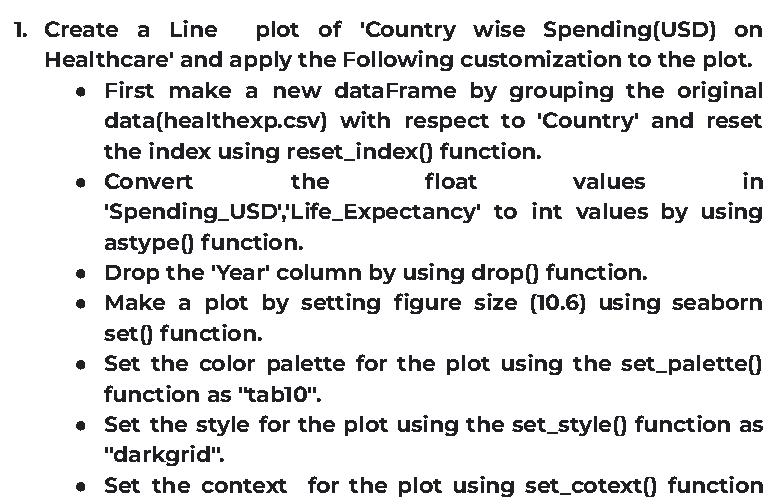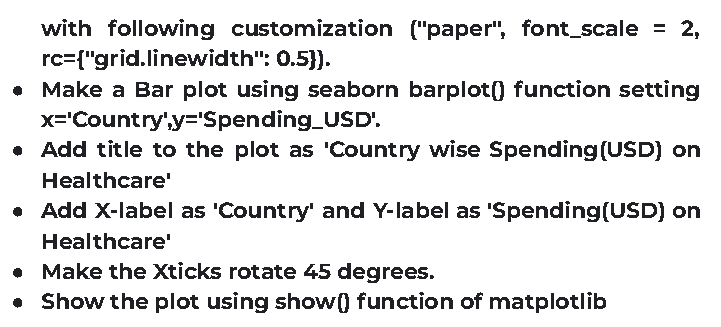

In [15]:
df_2 = df.groupby(['Country']).mean().reset_index()

In [16]:
df_2[['Spending_USD','Life_Expectancy']]=df_2[['Spending_USD','Life_Expectancy']].astype(int)

In [17]:
df_2=df_2.drop(['Year'], axis=1)

In [18]:
df_2

,Country,Spending_USD,Life_Expectancy
0,Canada,2685,78
1,France,3045,79
2,Germany,2759,76
3,Great Britain,2034,77
4,Japan,1860,79
5,USA,4388,75


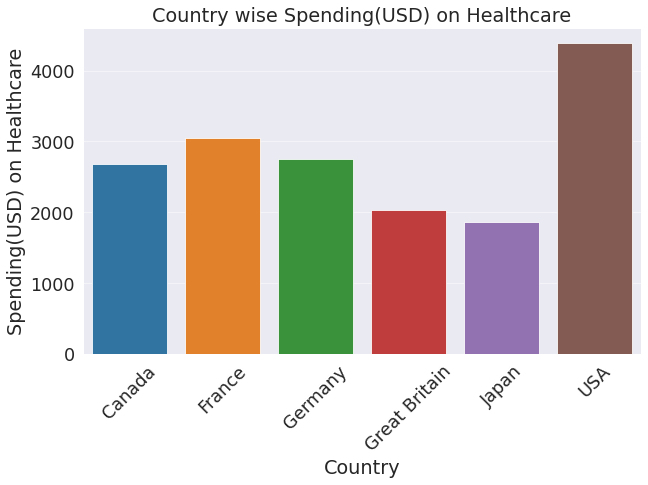

In [19]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_palette("tab10")
sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.5})
sns.barplot(data=df_2, x='Country',y='Spending_USD')
plt.title('Country wise Spending(USD) on Healthcare')
plt.xlabel('Country')
plt.ylabel('Spending(USD) on Healthcare')
plt.xticks(rotation=45)
plt.show()

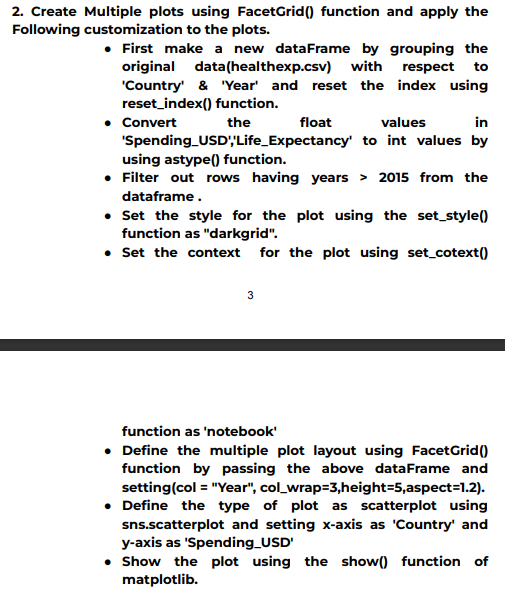

In [20]:
df_2015 = df.groupby(['Country','Year']).mean().reset_index()
df_2015[['Spending_USD','Life_Expectancy']]=df_2015[['Spending_USD','Life_Expectancy']].astype(int)

In [21]:
df_2015=df_2015[df_2015["Year"] > 2015]
df_2015.head()

,Country,Year,Spending_USD,Life_Expectancy
39,Canada,2016,5044,82
40,Canada,2017,5150,81
41,Canada,2018,5308,82
42,Canada,2019,5189,82
43,Canada,2020,5828,81


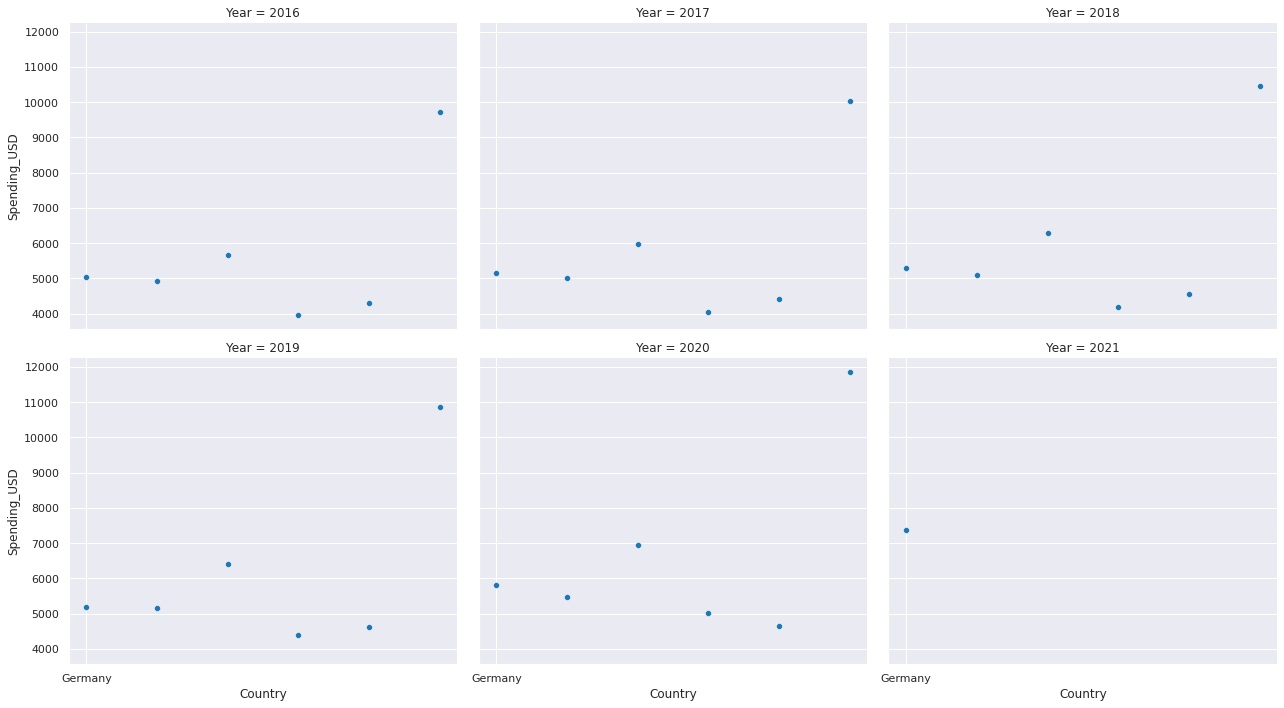

In [22]:
sns.set_style('darkgrid')
sns.set_context("notebook")
sea = sns.FacetGrid(df_2015, col = "Year", col_wrap=3,height=5,aspect=1.2)
sea.map(sns.scatterplot, "Country", "Spending_USD")
plt.show()